# Esplorazione e apprendimento automatico per gli annunci Airbnb in Trentino nel 2015

nota:
questo lavoro deriva da https://github.com/susanli2016/Machine-Learning-with-Python/blob/master/Airbnb%20Listing%20Toronto.ipynb ed è ben descritto in questo articolo https://towardsdatascience.com/exploring-machine-learning-for-airbnb-listings-in-toronto-efdbdeba2644

I dati sono quelli del Trentino di ottobre 2015 raccolti da InsideAirbnb - http://insideairbnb.com/trentino/#


Airbnb non fornisce dati aperti nel senso di database giganteschi o discariche con cui possiamo lavorare. Tuttavia, Inside Airbnb utilizza le informazioni pubbliche raccolte dal sito web di Airbnb e analizza le informazioni disponibili pubblicamente sulle inserzioni di Airbnb di una città, e fornisce filtri e metriche chiave in modo che possiamo vedere come Airbnb viene utilizzato nelle principali città del mondo. Inside Airbnb è un insieme indipendente di strumenti e dati non associati o sostenuti da Airbnb o dai concorrenti di Airbnb.
Tuttavia, le informazioni fornite da Inside Airbnb non saranno sufficienti per noi. Stiamo andando a scaricare i dati da lì per la nostra analisi.

Il lavoro è stato svolto da [Susan Li](https://github.com/susanli2016) sulla città di Toronto e, come descritto nel suo script, questo è un adattamento sui dati del Trentino.

Daremo un'occhiata alle inserzioni e ai calendari di Airbnb e cercheremo di fornire un'analisi esplorativa sulla previsione dei prezzi delle quotazioni, sia per, se lavorassimo ipoteticamente su Airbnb, sia per un consumatore.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [135]:
reviews = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/visualisations/reviews.csv')
calendar = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/calendar.csv.gz')
listings = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/listings.csv.gz')

# Calendario

Come è il calendario degli host Airbnb in Trentino?


In [3]:
print('Abbiamo', calendar.date.nunique(), 'giorni e', calendar.listing_id.nunique(), 'elenchi unici nei dati del calendario.')

Abbiamo 366 giorni e 1847 elenchi unici nei dati del calendario.


In [4]:
calendar.date.min(), calendar.date.max()

('2015-10-11', '2016-10-10')

I dati del calendario coprono un intervallo di tempo di un anno, vale a dire prezzo e disponibilità ogni giorno per il prossimo anno.

In [5]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         130856
dtype: int64

In [6]:
calendar.shape

(674155, 4)

In [7]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


In [112]:
calendar.price.unique()

array([  nan,   60.,   65.,   75.,   35.,   40.,   55.,   91.,   41.,
         99.,   79.,  199.,  189.,   89.,   68.,   80.,   85.,   70.,
         45.,   49.,   98.,  115.,   48.,   50.,  150.,   90.,   26.,
         58.,   74.,   76.,  136.,  102.,   81.,  100.,   69.,  159.,
        169.,  135.,  139.,  299.,  119.,  195.,  125.,   95.,  160.,
         88.,  105.,   43.,   23.,   20.,   28.,   30.,   38.,   44.,
         96.,  120.,  179.,  118.,   27.,   29.,   31.,   32.,   34.,
         33.,  129.,   78.,  260.,  140.,   25.,   53.,   22.,  110.,
         24.,   59.,  149.,   93.,   67.,   66.,  350.,  250.,  500.,
         52.,   82.,   72.,   62.,   73.,   83.,   46.,   56.,   57.,
         64.,  200.,  290.,  660.,  180.,  145.,   61.,   21.,  310.,
        380.,  520.,  360.,  415.,  330.,   71.,   18.,   63.,  130.,
         11.,   39.,  155.,   54.,  240.,   36.,   42.,  229.,  185.,
        112.,   97.,  108.,  214.,   87.,   84.,  114.,  235.,  128.,
        420.,  220.,

In [113]:
calendar.price.max()

2000.0

In [8]:
calendar.available.value_counts()

t    543299
f    130856
Name: available, dtype: int64

In [9]:
calendar_new = calendar[['date', 'available']]
calendar_new['busy'] = calendar_new.available.map( lambda x: 0 if x == 't' else 1)
calendar_new = calendar_new.groupby('date')['busy'].mean().reset_index()
calendar_new['date'] = pd.to_datetime(calendar_new['date'])

/home/napo/dev/python_scripts/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


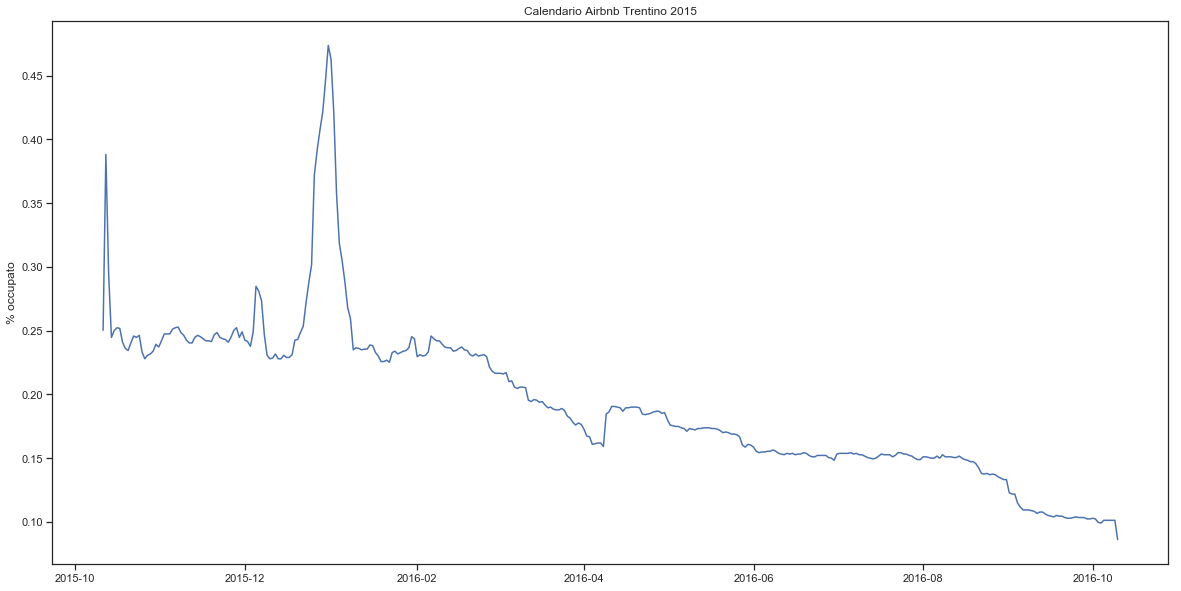

In [111]:
plt.figure(figsize=(20, 10))
plt.plot(calendar_new['date'], calendar_new['busy'])
plt.title('Calendario Airbnb Trentino 2015')
plt.ylabel('% occupato')
plt.show();

In [11]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


# Prezzi nel calendario
Come cambiano i prezzi anno dopo mese?

In [12]:
calendar.head()

,listing_id,date,available,price
0,4906642,2015-10-12,f,NaN
1,4906642,2015-10-13,f,NaN
2,4906642,2015-10-14,f,NaN
3,4906642,2015-10-15,f,NaN
4,4906642,2015-10-16,f,NaN


Rimuovere il simbolo "$" nella colonna dei prezzi e conversione a numerico, e conversione della data in tipo datetime.


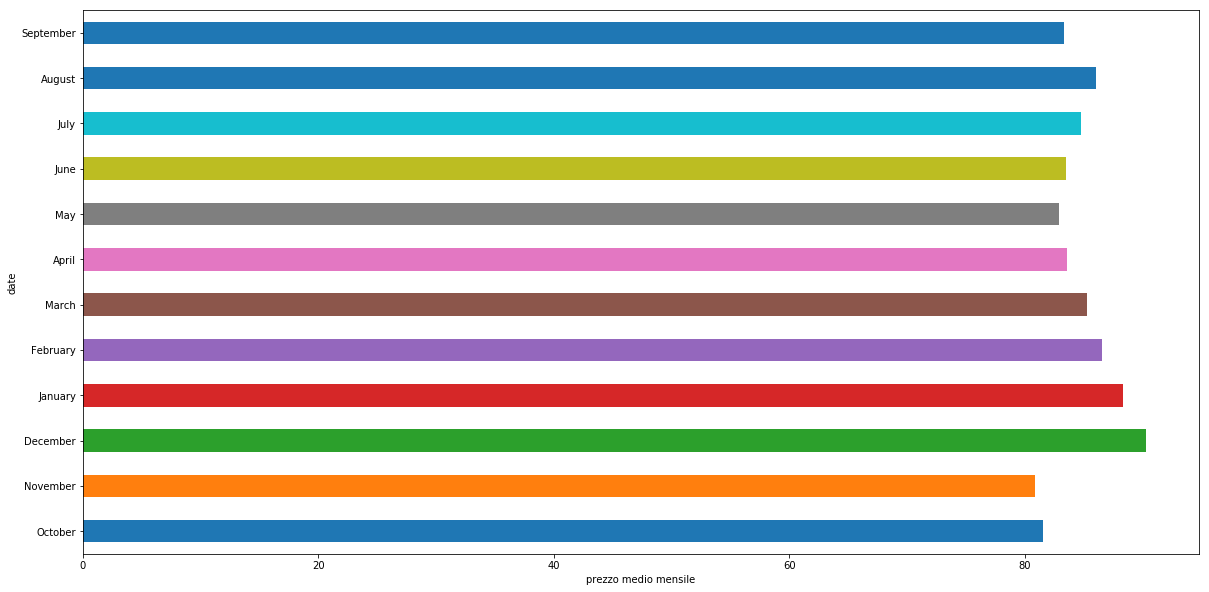

In [13]:
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['price'] = calendar['price'].str.replace(',', '')
calendar['price'] = calendar['price'].str.replace('$', '')
calendar['price'] = calendar['price'].astype(float)
calendar['date'] = pd.to_datetime(calendar['date'])
mean_of_month = calendar.groupby(calendar['date'].dt.strftime('%B'),
                                 sort=False)['price'].mean()
mean_of_month.plot(kind = 'barh' , figsize = (20,10))
plt.xlabel('prezzo medio mensile');

Il prezzo di Airbnb in Trentino aumenta nel mese di agosto 2015 e di dicembre 2014: di fatto sono i mesi di alta stagione (invernale ed estiva)

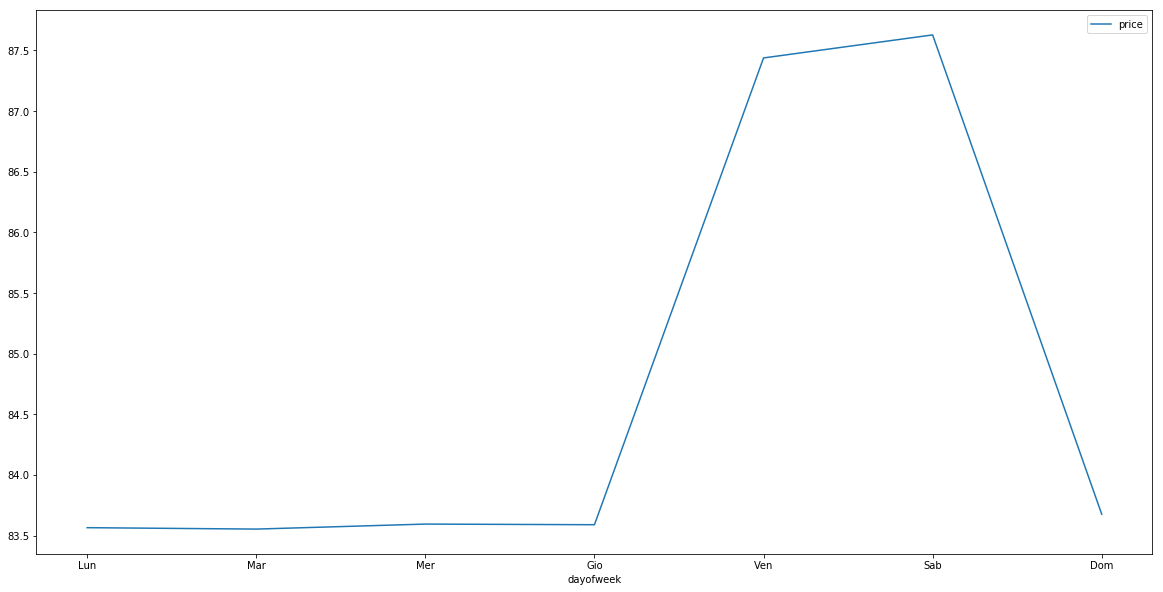

In [14]:
calendar['dayofweek'] = calendar.date.dt.weekday_name
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
price_week=calendar[['dayofweek','price']]
price_week = calendar.groupby(['dayofweek']).mean().reindex(cats)
price_week.drop('listing_id', axis=1, inplace=True)
price_week.plot(figsize=(20, 10))
ticks = list(range(0, 7, 1)) # points on the x axis where you want the label to appear
labels = "Lun Mar Mer Gio Ven Sab Dom".split()
plt.xticks(ticks, labels);



venerdì e sabato sono i giorni in cui i prezzi salgono di almeno 4 euro


In [15]:
print('Abbiamo', listings.id.nunique(), 'elenchi nel relativo dataset.')

Abbiamo 1847 elenchi nel relativo dataset.


In [16]:
listings.groupby(by='neighbourhood_cleansed').count()[['id']].sort_values(by='id', ascending=False).head(10)

,id
neighbourhood_cleansed,
Trentino,1692
"Trento, Trentino",155


il dataset è diviso con per Trento  (città) e Trentino (tutto il resto della Pronvincia)

# punteggio delle recensioni


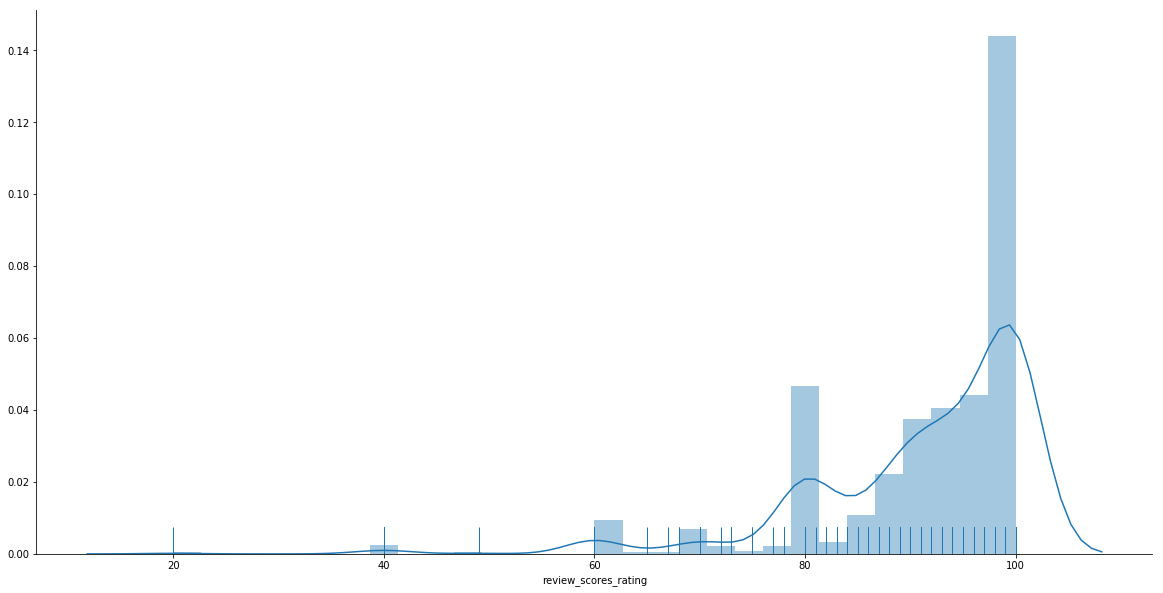

In [17]:
plt.figure(figsize=(20,10))
sns.distplot(listings.review_scores_rating.dropna(), rug=True)
sns.despine()
plt.show();

In [121]:
listings.review_scores_rating.describe()

count    907.000000
mean      91.386990
std       10.639755
min       20.000000
25%       87.000000
50%       95.000000
75%      100.000000
max      100.000000
Name: review_scores_rating, dtype: float64

Come previsto, la maggior parte dei revisori lascia alti punteggi.

# Esplorare i prezzi

i dati sono in dollari, andiamo a convertirli in euro usando il valore di un dollaro in euro al 2015

i dati della Banca d'Italia riportano

*1 dollaro = **1,0887** euro*

https://www.bancaditalia.it/compiti/operazioni-cambi/cambio/cambi_rif_20151231/


In [138]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings['price'] = (listings['price']*1.0887)
listings['price'].describe()

count    1847.000000
mean       89.129576
std        64.790536
min        11.975700
25%        54.435000
50%        76.209000
75%       101.793450
max      1088.700000
Name: price, dtype: float64

In [139]:
listings['price'].unique()

array([  65.322 ,   81.6525,   38.1045,  107.7813,   76.209 ,   48.9915,
        106.6926,   54.435 ,   70.7655,  163.305 ,   97.983 ,   28.3062,
         52.2576,  108.87  ,  146.9745,   87.096 ,  212.2965,   43.548 ,
        125.2005,   92.5395,  174.192 ,   95.8056,   21.774 ,   30.4836,
         32.661 ,   41.3706,   59.8785,   47.9028,  128.4666,   29.3949,
         84.9186,   34.8384,  283.062 ,  152.418 ,   75.1203,   33.7497,
         79.4751,  130.644 ,  119.757 ,  140.4423,   25.0401,   26.1288,
         64.2333,  162.2163,   96.8943,   27.2175,   72.9429,   71.8542,
        381.045 ,  272.175 ,  103.4265,   31.5723,   63.1446,   37.0158,
        136.0875,  104.5152,   74.0316,   22.8627,  544.35  ,   67.4994,
         19.5966,   82.7412,   11.9757,  141.531 ,   68.5881,   39.1932,
         35.9271,   99.0717,   86.0073,   58.7898,  435.48  ,   51.1689,
        114.3135,  155.6841,   45.7254,  228.627 ,  217.74  ,   53.3463,
        190.5225,   78.3864,  326.61  ,  201.4095, 

In [140]:
listings['price'].max()

1088.7

In [141]:
most_expensive_accommodation= listings[listings.price == listings.price.max()].listing_url

In [142]:
most_expensive_accommodation.values[0]

'https://www.airbnb.com/rooms/6086006'

l'alloggio Airbnb più costoso del Trentino è di euro 1000/ notte.

Dall'URL della quotazione, sembra legittimo https://www.airbnb.com/rooms/6086006 in quanto si tratta di una villa con giardino sulle piste da sci.


![](https://a0.muscache.com/im/pictures/94bdd17e-7f4d-4d3f-b773-25a5fda0280d.jpg?aki_policy=large)


In [143]:
mea=listings.iloc[np.argmax(listings['price'])]

/home/napo/dev/python_scripts/env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


In [144]:
mea

id                                                                            6086006
listing_url                                      https://www.airbnb.com/rooms/6086006
scrape_id                                                              20151011232639
last_scraped                                                               2015-10-12
name                                                          Appartamento a Predazzo
summary                             Appartamento a nuovo in casa singola con giard...
space                                                                             NaN
description                         Appartamento a nuovo in casa singola con giard...
experiences_offered                                                              none
neighborhood_overview                                                             NaN
notes                                                                             NaN
transit                                               

Rimozione degli alloggi che hanno prezzo superirore a $600/notte, ed anche quelli con prezzo uguale a zero, attraverso i seguenti comandi

In [145]:
listings.loc[listings['price'] > 600]['price'].describe()

count       4.000000
mean      830.405925
std       195.310423
min       654.308700
25%       694.318425
50%       789.307500
75%       925.395000
max      1088.700000
Name: price, dtype: float64

In [146]:
listings.loc[listings['price'] == 0]['price'].count()

0

## Distribuzione dei prezzi degli alloggi dopo aver rimosso i valori anomali

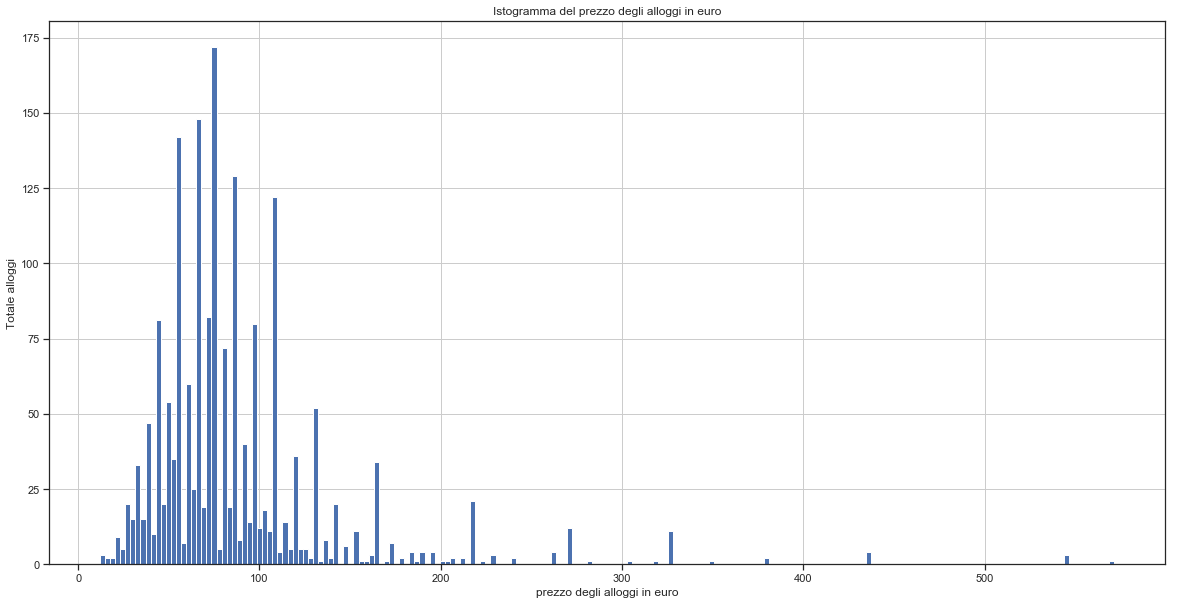

In [148]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].price.hist(bins=200)
plt.ylabel('Totale alloggi')
plt.xlabel('prezzo degli alloggi in euro')
plt.rcParams["figure.figsize"] = [20,10]
plt.title('Istogramma del prezzo degli alloggi in euro');
#plt.figure(figsize=(20, 15))
plt.show()


## aree e prezzi

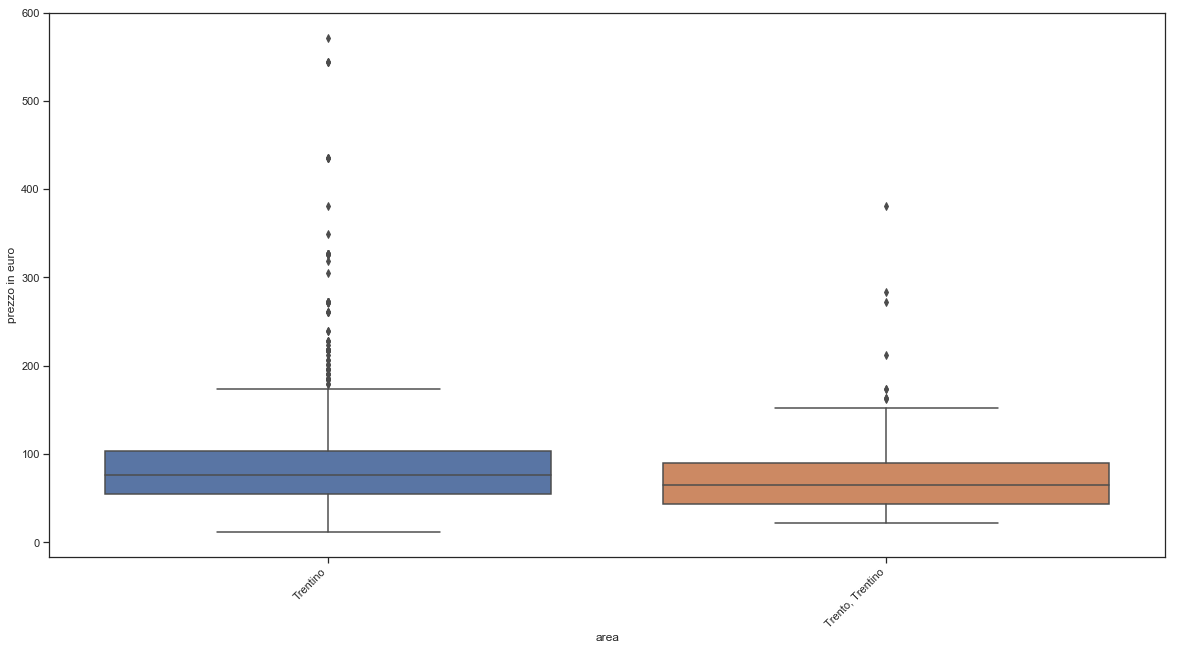

In [149]:

sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('neighbourhood_cleansed')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='neighbourhood_cleansed', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], 
            order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel('prezzo in euro')
plt.xlabel('area')
plt.show()




i prezzi in trentino sono superiori a Trento

## alloggio - prezzo

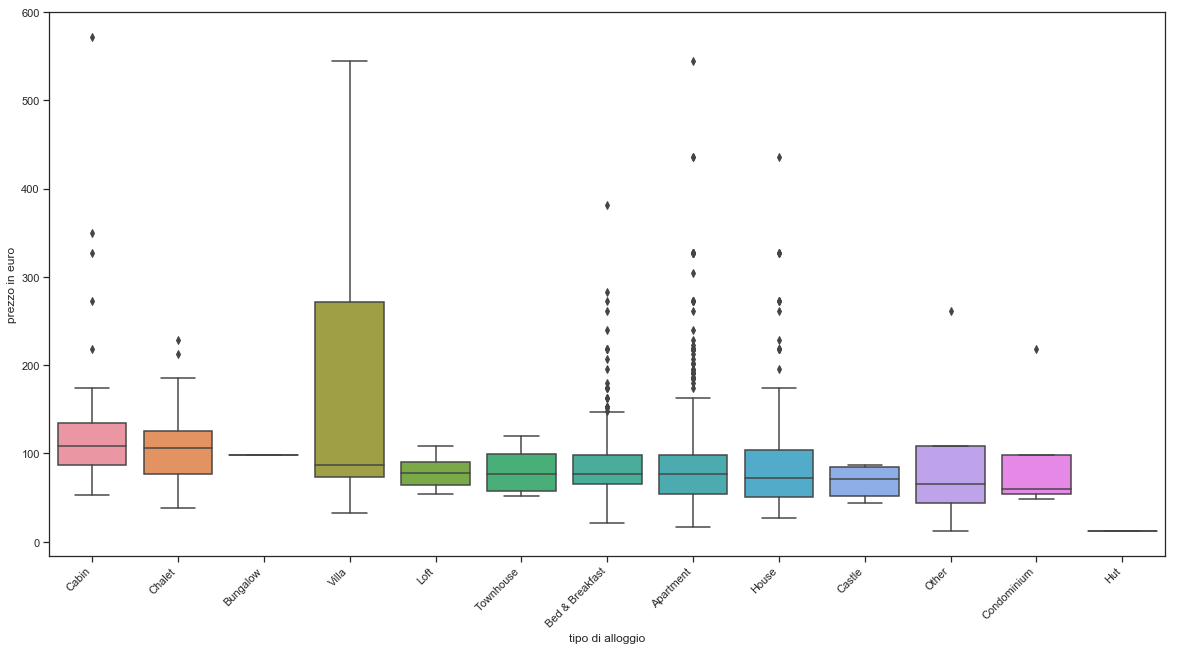

In [150]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('property_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='property_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel('prezzo in euro')
plt.xlabel('tipo di alloggio')
plt.show();

Quando osserviamo il prezzo medio per ciascun tipo di proprietà, dobbiamo stare attenti a cosa affermiamo perchè dobbiamo prendere in considerazione anche quante sono le varie tipologia (es. Castello sono 6 e Bungalow 1)

In [30]:
listings.property_type.value_counts()

Apartment          1231
Bed & Breakfast     343
House               161
Cabin                35
Villa                24
Chalet               17
Loft                 10
Other                 9
Castle                6
Condominium           5
Townhouse             4
Hut                   1
Bungalow              1
Name: property_type, dtype: int64

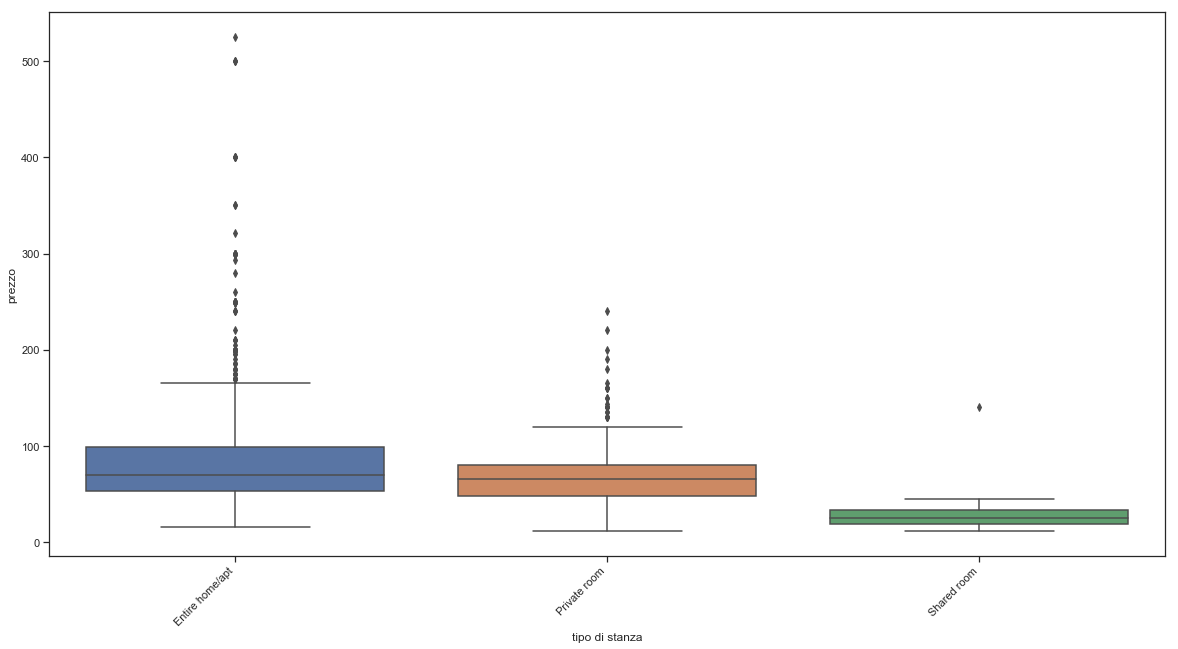

In [92]:
sort_price = listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                    .groupby('room_type')['price']\
                    .median()\
                    .sort_values(ascending=False)\
                    .index
sns.boxplot(y='price', x='room_type', data=listings.loc[(listings.price <= 600) & (listings.price > 0)], order=sort_price)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
plt.rcParams["figure.figsize"] = [20,10]
plt.ylabel('prezzo in euro')
plt.xlabel('tipo di stanza')
plt.show();


Inutile dire che una intera camera / appartamento (apt) ha un prezzo medio molto più alto rispetto agli altri tipi di camera.

Text(0,0.5,'Frequenza')

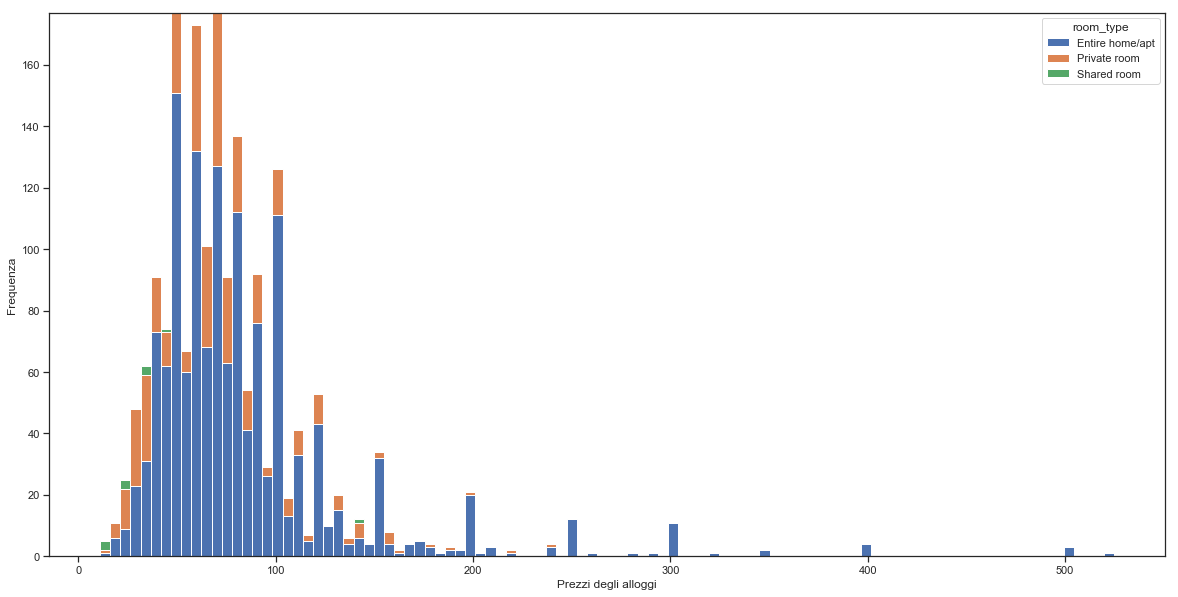

In [84]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'room_type', values = 'price').plot.hist(stacked = True, bins=100)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('Prezzi degli alloggi in euro');
plt.ylabel('Frequenza')

## Servizi

In [33]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [34]:
listings['amenities'].head()

0    Wireless Internet,Kitchen,Pets Allowed,Breakfa...
1    TV,Cable TV,Internet,Wireless Internet,Air Con...
2    TV,Kitchen,Free Parking on Premises,Smoking Al...
3    TV,Wireless Internet,Air Conditioning,Wheelcha...
4    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, dtype: object

### I 20 servizi più comuni

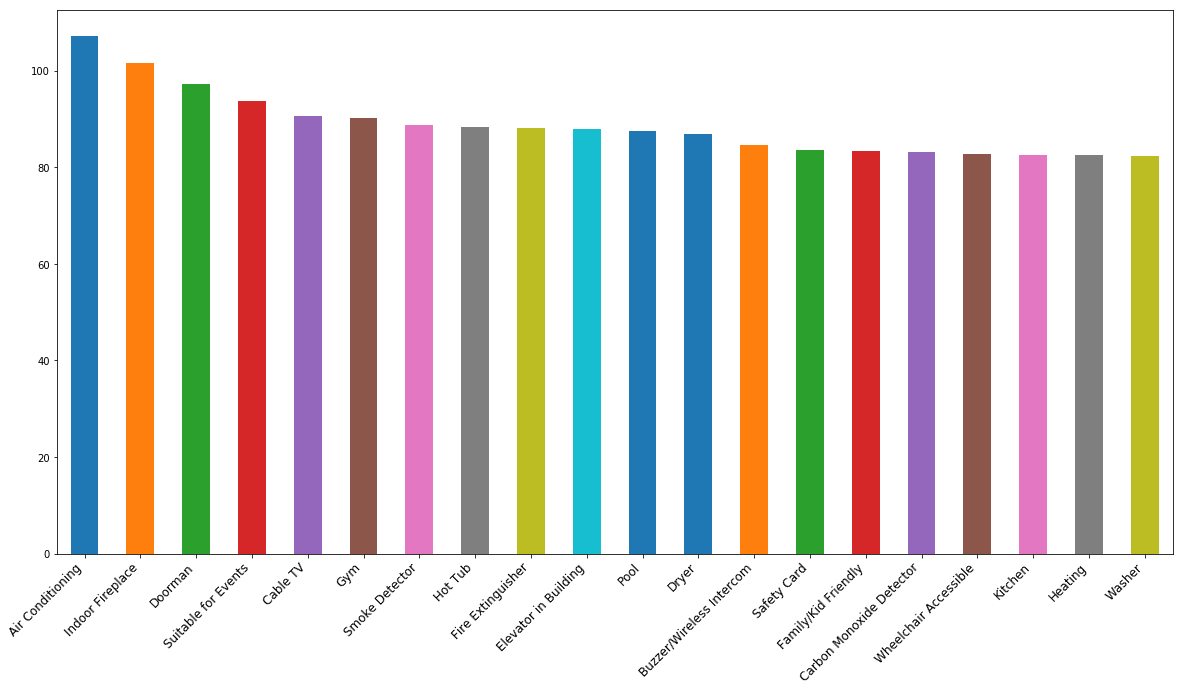

In [35]:
amenities = np.unique(np.concatenate(listings['amenities'].map(lambda amns: amns.split(","))))
amenity_prices = [(amn, listings[listings['amenities'].map(lambda amns: amn in amns)]['price'].mean()) for amn in amenities if amn != ""]
amenity_srs = pd.Series(data=[a[1] for a in amenity_prices], index=[a[0] for a in amenity_prices])

amenity_srs.sort_values(ascending=False)[:20].plot(kind='bar')
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
plt.rcParams["figure.figsize"] = [20,10]
plt.show();

Interessante: la caratteristica dei servizi sembra avere qualche relazione con il prezzo.

## numero di camere contro prezzo


Text(0,0.5,'frequenza')

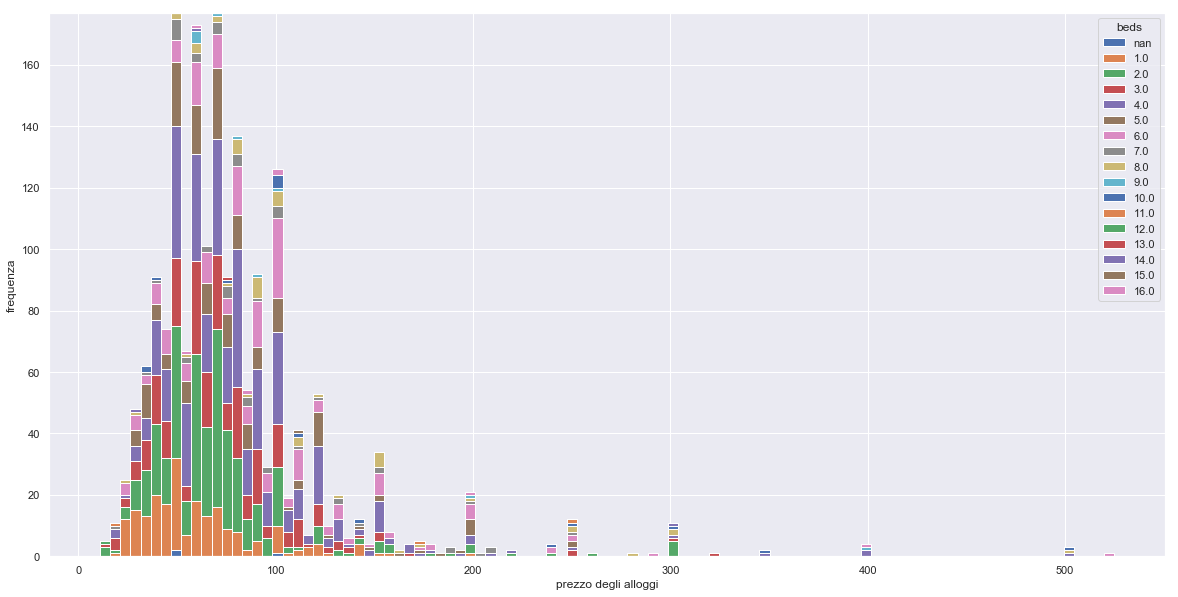

In [61]:
listings.loc[(listings.price <= 600) & (listings.price > 0)].pivot(columns = 'beds',values = 'price').plot.hist(stacked = True,bins=100)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('prezzo degli alloggi in euro');
plt.ylabel('frequenza')

La maggior parte degli alloggi ha due letti, i prezzi di listino di un letto hanno una gamma molto ampia. Ci sono alloggi che non hanno letti.

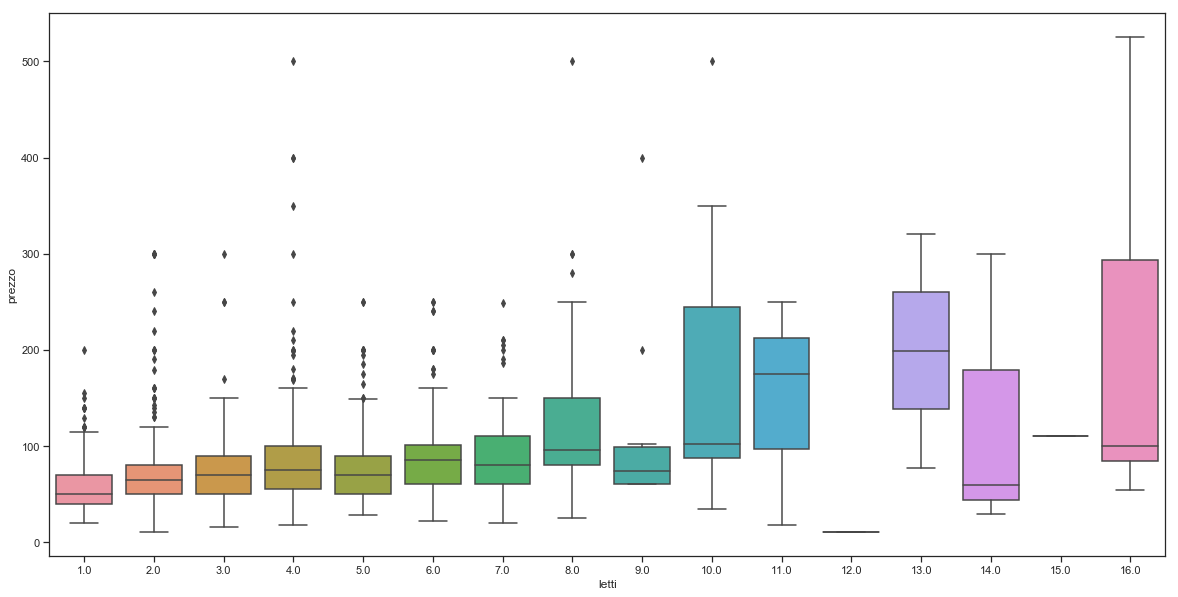

In [88]:
sns.boxplot(y='price', x='beds', data = listings.loc[(listings.price <= 600) & (listings.price > 0)])
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('letti');
plt.ylabel('prezzo in euro')
plt.show();

## caratteristiche numeriche
Selezioniamo diverse funzionalità numeriche e proviamo a esplorarle tutte insieme.

<Figure size 1440x1440 with 0 Axes>

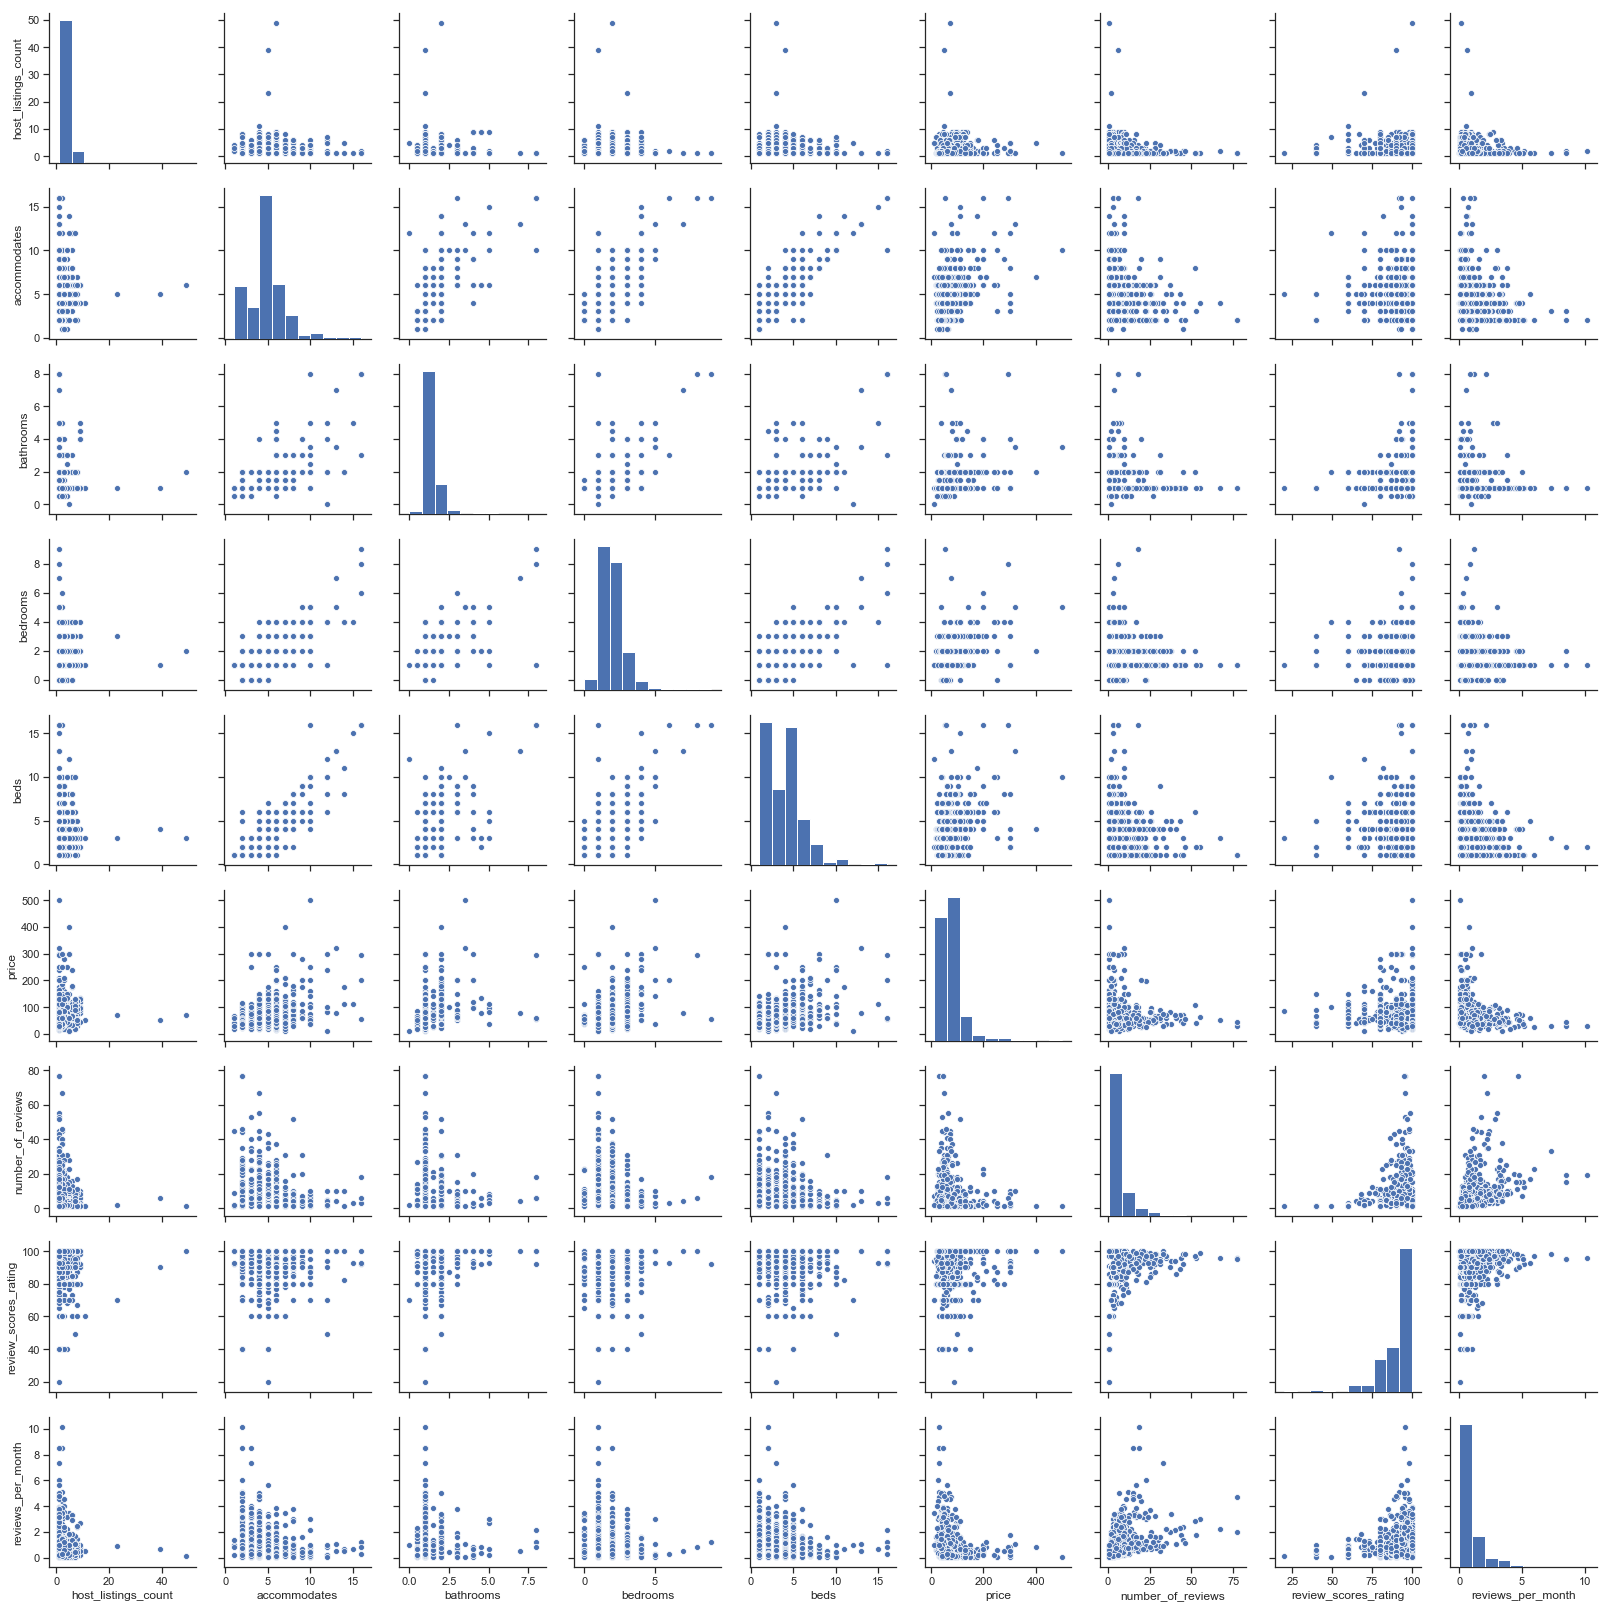

In [81]:
col = ['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']
sns.set(style="ticks", color_codes=True)
plt.figure(figsize = (20,20))
sns.pairplot(listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna())
plt.show();

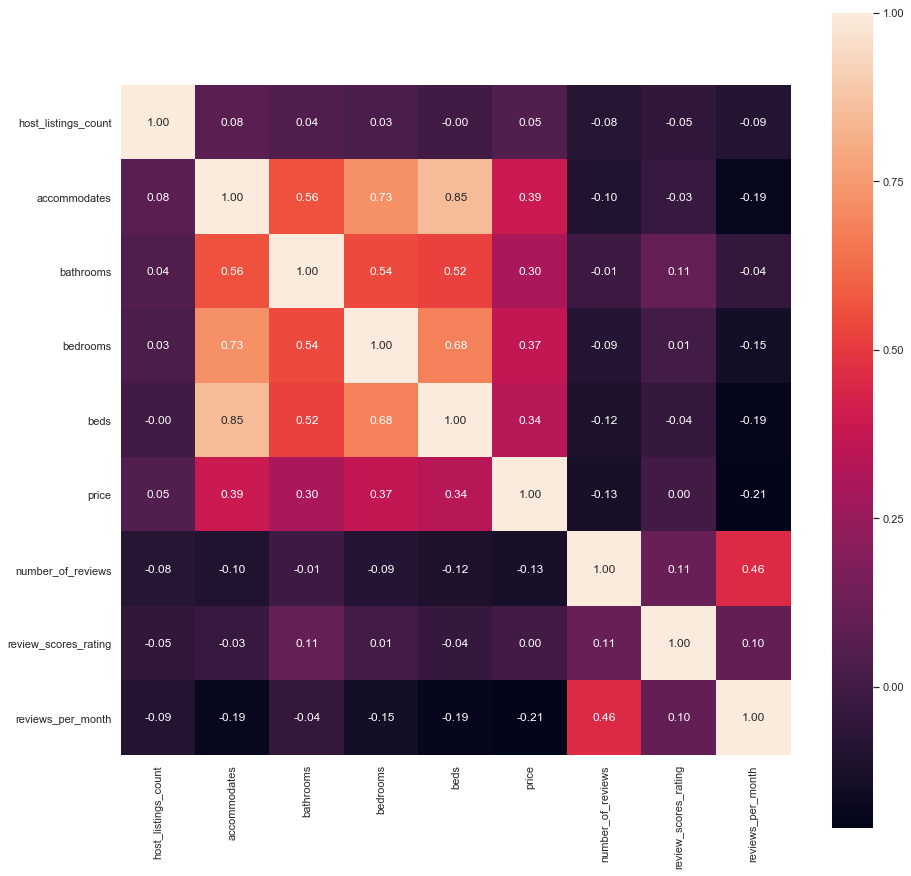

In [70]:
corr = listings.loc[(listings.price <= 600) & (listings.price > 0)][col].dropna().corr()
plt.figure(figsize = (15,15))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

Ci sono alcune informazioni interessanti come quella che il numero di camere da letto e gli ospiti sembrano essere correlati con il prezzo.

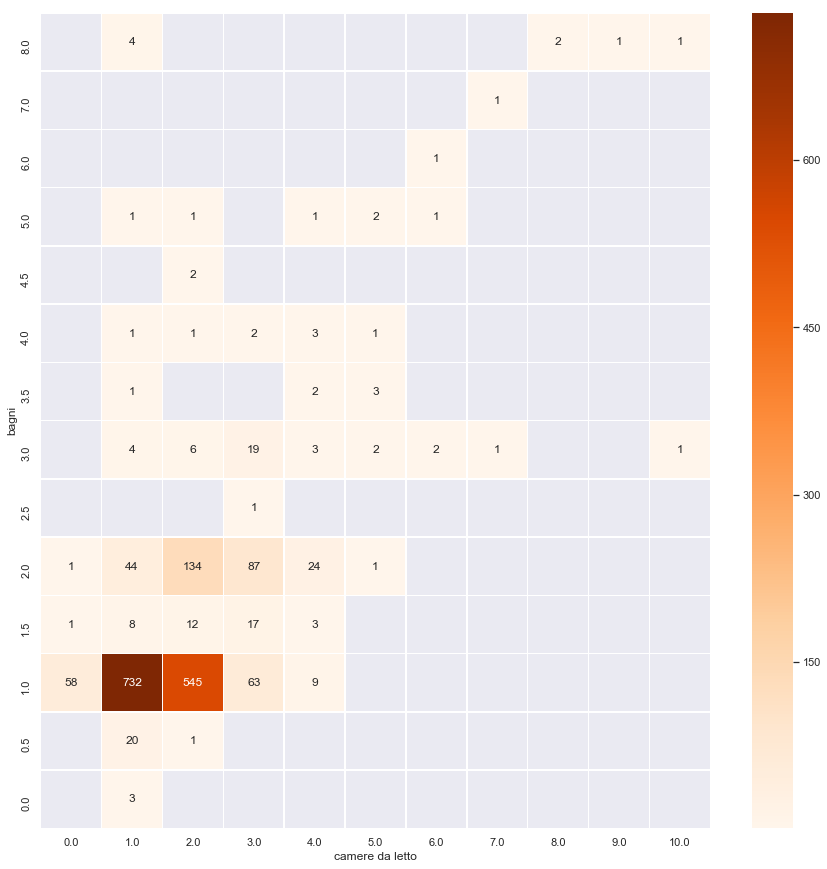

In [74]:
plt.figure(figsize = (15,15))
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .count()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('camere da letto');
plt.ylabel('bagni')
plt.show();


La maggior parte degli alloggi ha una camera da letto e 1 bagno.

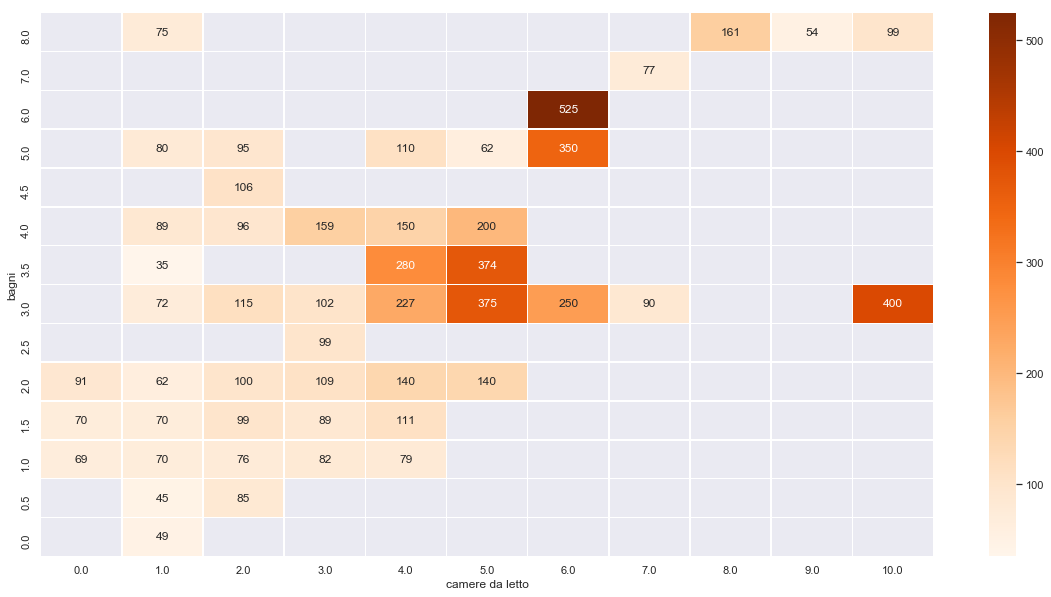

In [75]:
sns.heatmap(listings.loc[(listings.price <= 600) & (listings.price > 0)]\
                .groupby(['bathrooms', 'bedrooms'])\
                .mean()['price']\
                .reset_index()\
                .pivot('bathrooms', 'bedrooms', 'price')\
                .sort_index(ascending=False),
            cmap="Oranges", fmt='.0f', annot=True, linewidths=0.5)
plt.rcParams["figure.figsize"] = [20,10]
plt.xlabel('camere da letto');
plt.ylabel('bagni')
plt.show();


Sembra che le inserzioni con 6 camere da letto e 6 bagni abbiano il prezzo medio più alto. Ma dobbiamo essere scettici su questo risultato perché dal grafico sopra riportato, non sappiamo quanti sono gli alloggi in questa categoria.

# Modellazione della proiezione dei prezzi
## Preelaborazione dei dati e calcolo delle caratteristiche

In [152]:
listings = pd.read_csv('http://data.insideairbnb.com/italy/trentino-alto-adige-s%C3%BCdtirol/trentino/2015-10-12/data/listings.csv.gz')

Funzionalità del prezzo di elaborazione. La funzione che modelleremo e predicheremo.

In [153]:
listings['price'] = listings['price'].str.replace(',', '')
listings['price'] = listings['price'].str.replace('$', '')
listings['price'] = listings['price'].astype(float)
listings = listings.loc[(listings.price <= 600) & (listings.price > 0)]

Matrice di documenti a termine per funzionalità di servizi.

In [154]:
listings.amenities = listings.amenities.str.replace("[{}]", "").str.replace('"', "")

In [155]:
listings.amenities.head()

0    Wireless Internet,Kitchen,Pets Allowed,Breakfa...
1    TV,Cable TV,Internet,Wireless Internet,Air Con...
2    TV,Kitchen,Free Parking on Premises,Smoking Al...
3    TV,Wireless Internet,Air Conditioning,Wheelcha...
4    TV,Cable TV,Internet,Wireless Internet,Kitchen...
Name: amenities, dtype: object

In [156]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
amenities = count_vectorizer.fit_transform(listings['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

Sostituisci i valori nella seguente funzione a 0 se "f", a 1 se "t".

In [157]:
columns =  ['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic',
                   'is_location_exact', 'requires_license', 'instant_bookable',
                   'require_guest_profile_picture', 'require_guest_phone_verification']
for c in columns:
    listings[c] = listings[c].replace('f',0,regex=True)
    listings[c] = listings[c].replace('t',1,regex=True)

Stesso modo per ripulire le altre colonne del valore monetario.

In [158]:
listings['security_deposit'] = listings['security_deposit'].fillna(value=0)
listings['security_deposit'] = listings['security_deposit'].replace( '[\$,)]','', regex=True ).astype(float)
listings['cleaning_fee'] = listings['cleaning_fee'].fillna(value=0)
listings['cleaning_fee'] = listings['cleaning_fee'].replace( '[\$,)]','', regex=True ).astype(float)

Le seguenti sono le caratteristiche numeriche che useremo.

In [159]:
listings_new = listings[['host_is_superhost', 'host_identity_verified', 'host_has_profile_pic','is_location_exact', 
                         'requires_license', 'instant_bookable', 'require_guest_profile_picture', 
                         'require_guest_phone_verification', 'security_deposit', 'cleaning_fee', 
                         'host_listings_count', 'host_total_listings_count', 'minimum_nights',
                     'bathrooms', 'bedrooms', 'guests_included', 'number_of_reviews','review_scores_rating', 'price']]


Riempi i valori mancanti nelle caratteristiche numeriche con la mediana.

In [160]:
for col in listings_new.columns[listings_new.isnull().any()]:
    print(col)

host_is_superhost
host_identity_verified
host_has_profile_pic
host_listings_count
host_total_listings_count
bathrooms
bedrooms
review_scores_rating


In [161]:
for col in listings_new.columns[listings_new.isnull().any()]:
    listings_new[col] = listings_new[col].fillna(listings_new[col].median())


/home/napo/dev/python_scripts/env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Elaborazione delle caratteristiche per categoria 

In [171]:
for cat_feature in ['zipcode','property_type', 'room_type', 'cancellation_policy', 'neighbourhood_cleansed', 'bed_type']:
    listings_new = pd.concat([listings_new, pd.get_dummies(listings[cat_feature])], axis=1)

Aggiunta di funzionalità di servizi

In [172]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')

Pre-elaborazione dei dati e definizione delle categorie completata!

# Random Forest Regressor

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 31.636
R^2 test: 0.394


## Feature importance of Random Forest


In [174]:
coefs_df = pd.DataFrame()

coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
14,bedrooms,0.139903
9,cleaning_fee,0.084682
15,guests_included,0.076905
8,security_deposit,0.064116
16,number_of_reviews,0.046948
134,38066,0.041159
13,bathrooms,0.036015
12,minimum_nights,0.027206
11,host_total_listings_count,0.021920
10,host_listings_count,0.021912


Note sui CAP:
- 38066 = Riva del Garda
- 38086 = Madonna di Campiglio / Pinzolo
- 38122 = Trento
- 38068 = Rovereto
- 38031 = Capitello di FAssa

## LightGBM

In [176]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }

In [177]:
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')

In [178]:
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)

Training until validation scores don't improve for 20 rounds.
[100]	valid's rmse: 35.0987
[200]	valid's rmse: 33.7791
[300]	valid's rmse: 33.4075
Early stopping, best iteration is:
[353]	valid's rmse: 33.2975


LGBMRegressor_GainFE(boosting_type='gbdt', class_weight=None,
           colsample_bytree=0.9, importance_type='split',
           learning_rate=0.01, max_depth=20, metric='rmse',
           min_child_samples=20, min_child_weight=0.001,
           min_split_gain=0.0, n_estimators=1000, n_jobs=4, num_leaves=25,
           objective=None, random_state=0, reg_alpha=0.0, reg_lambda=0.0,
           silent=True, subsample=0.9, subsample_for_bin=200000,
           subsample_freq=0)

In [179]:
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

R^2 test: 0.329


## Feature importance of LightGBM

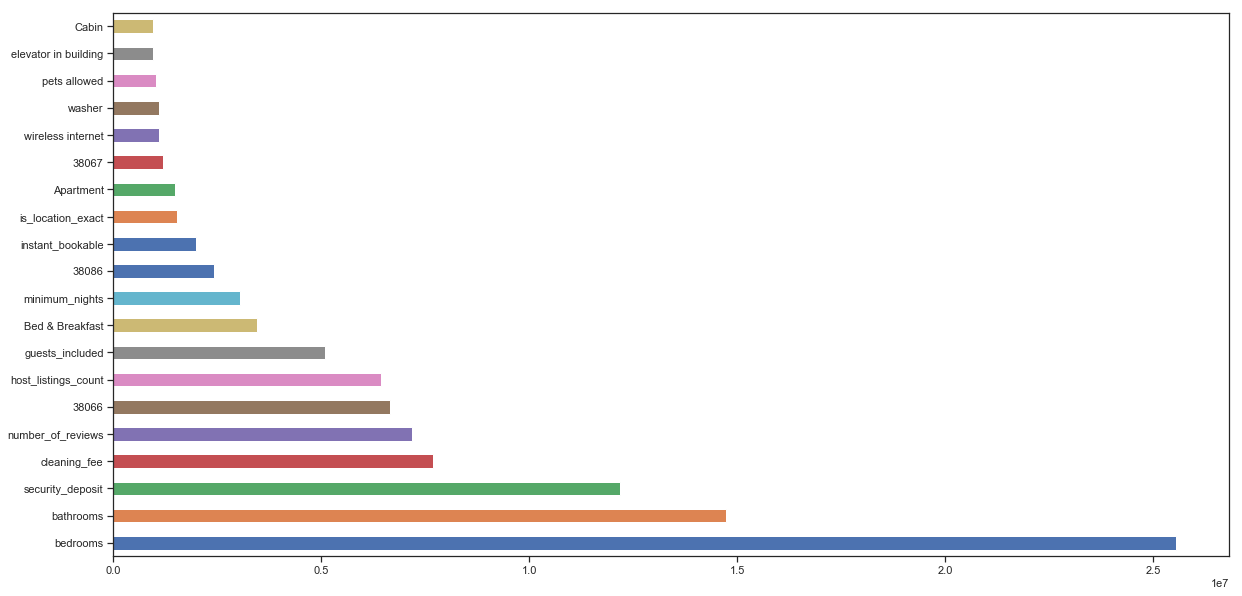

In [180]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(20,10))


Bagni e stanze da letto influenzano il prezzo così come altri valori fra cui anche l'essere a Riva del Garda, Madonna di Campiglio 